In [78]:
import numpy as np
import numpy.random as rand
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# Directory of EQAPOL Normal Flow Data

In [1]:
!ls /data/flow/EQAPOL_normal

AMJ_5L_CMV_pp65.RData	  E6901FYZ-01_Costim.txt    J6901CDB-01_Costim.txt
AMJ_5L_CMV_pp65.txt	  E6901FYZ-01_SEB.txt	    J6901CDB-01_SEB.txt
AMJ_5L_Costim.RData	  F69018CN-01_CMV_pp65.txt  J6901HJ1-06_CMV_pp65.txt
AMJ_5L_Costim.txt	  F69018CN-01_Costim.txt    J6901HJ1-06_Costim.txt
AMJ_5L_SEB.txt		  F69018CN-01_SEB.txt	    J6901HJ1-06_SEB.txt
B6901GFJ-08_CMV_pp65.txt  F6901DJK-01_CMV_pp65.txt  K690194C-01_CMV_pp65.txt
B6901GFJ-08_Costim.txt	  F6901DJK-01_Costim.txt    K690194C-01_Costim.txt
B6901GFJ-08_SEB.txt	  F6901DJK-01_SEB.txt	    K690194C-01_SEB.txt
default.pdf		  G6901B3H-01_CMV_pp65.txt  K6901DKW-01_CMV_pp65.txt
E6901F0T-07_CMV_pp65.txt  G6901B3H-01_Costim.txt    K6901DKW-01_Costim.txt
E6901F0T-07_Costim.txt	  G6901B3H-01_SEB.txt	    K6901DKW-01_SEB.txt
E6901F0T-07_SEB.txt	  Icon?			    markers.txt
E6901FYZ-01_CMV_pp65.txt  J6901CDB-01_CMV_pp65.txt  modified1.pdf


# Read in EQAPOL Normal Data

In [31]:
data_dir = "/data/flow/EQAPOL_normal/"
files = [glob.glob(data_dir + "*" + idx_name + ".txt") 
         for idx_name in ['Costim', 'CMV_pp65', 'SEB']]
files = np.array(files)

Markers

In [50]:
markers = np.loadtxt(data_dir + 'markers.txt', dtype=str, delimiter=",")
markers_dict = {items[1]: idx for idx, items in enumerate(markers)}
print(markers.shape)
print("==================")
print(markers)
print("==================")
print(markers_dict)

(14, 2)
[['Scatter' 'FSC-H']
 ['Scatter' 'FSC-W']
 ['Scatter' 'FSC-A']
 ['Basic' 'CD14 CD19 vAmine']
 ['Basic' 'CD3 AmCyan']
 ['Basic' 'CD4 PerCP Cy55']
 ['Basic' 'CD8 APC Cy7']
 ['Maturational' 'CD45RO ECD']
 ['Maturational' 'CD27 APC']
 ['Maturational' 'CD57 FITC']
 ['Functional' 'TNFa A700']
 ['Functional' 'IL 2 PE']
 ['Functional' 'IFNg PE Cy7']
 ['Functional' 'CD107 PE Cy5']]
{'FSC-H': 0, 'FSC-W': 1, 'FSC-A': 2, 'CD14 CD19 vAmine': 3, 'CD3 AmCyan': 4, 'CD4 PerCP Cy55': 5, 'CD8 APC Cy7': 6, 'CD45RO ECD': 7, 'CD27 APC': 8, 'CD57 FITC': 9, 'TNFa A700': 10, 'IL 2 PE': 11, 'IFNg PE Cy7': 12, 'CD107 PE Cy5': 13}


In [93]:
#data = np.genfromtxt('/data/flow/EQAPOL_normal/AMJ_5L_Costim.txt')
data_Costim = np.loadtxt(data_dir + 'AMJ_5L_Costim.txt')
data_CMV    = np.loadtxt(data_dir + 'AMJ_5L_CMV_pp65.txt')
data_SEB    = np.loadtxt(data_dir + 'AMJ_5L_SEB.txt')
print(data_Costim.shape)
print(data_CMV.shape)
print(data_SEB.shape)

(455472, 14)
(411894, 14)
(422658, 14)


In [95]:
data_all = [data_Costim, data_CMV, data_SEB]

# Visualize EQAPOL Normal Data
https://seaborn.pydata.org/generated/seaborn.regplot.html

In [102]:
# set random seed
rand.seed(0)

# index for subset of data
idx_markder = [markers_dict['CD4 PerCP Cy55'], markers_dict['CD8 APC Cy7']]

#
k = 100000 # 100,000
subdata = []
for idx_data in range(3):
    data = data_all[idx_data]
    idx_sample  = rand.permutation(range(data.shape[0]))[:k]
    
    #subdata = data[idx_sample, :][:, idx_marker]
    idx = np.ix_(idx_sample, idx_marker)
    subdata.append(data[idx])
    print(subdata[idx_data].shape)

(100000, 2)
(100000, 2)
(100000, 2)


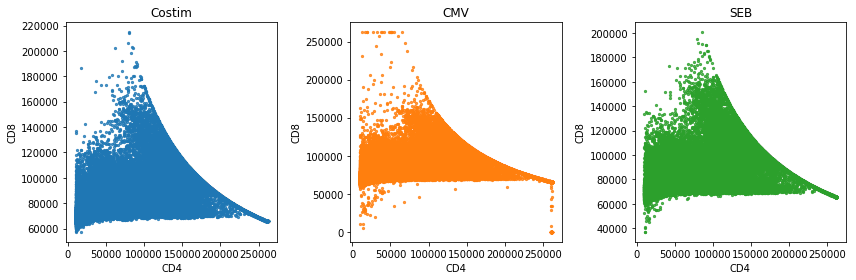

In [110]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
#axes.scatter(subdata[:, 0], subdata[:, 1], s = 3, alpha = 0.8)
#axes.set(xscale="log", yscale="log")

subdata_name = ["Costim", "CMV", "SEB"]
for idx_data in range(3):
    # intialization
    ax = axes[idx_data]
    data = subdata[idx_data]
    title = subdata_name[idx_data]
    
    # plot scatter plot
    sns.regplot(
        data[:, 0], data[:, 1], 
        ax = ax,
        fit_reg = False, 
        scatter_kws={'s': 5})
    
    # set plot
    ax.set_title(title)
    ax.set_xlabel("CD4")
    ax.set_ylabel("CD8")

plt.tight_layout()
plt.show()

In [123]:
fig, axes = plt.subplots(2, 3, figsize = (12, 4))
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f0bbf60f0>,
      dtype=object)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (12, 4))
#axes.scatter(subdata[:, 0], subdata[:, 1], s = 3, alpha = 0.8)
#axes.set(xscale="log", yscale="log")

subdata_name = ["Costim", "CMV", "SEB"]
for idx_data in range(3):
    data = subdata[idx_data]
    
    for idx_gene in range(2):
        # intialization
        ax = axes[idx_gene][idx_data]
        
    # plot scatter plot
    sns.regplot(
        data[:, 0], data[:, 1], 
        ax = ax,
        fit_reg = False, 
        scatter_kws={'s': 5})
    
    # set plot
    ax.set_title(title)
    ax.set_xlabel("CD4")
    ax.set_ylabel("CD8")

plt.tight_layout()
plt.show()

# Converted to tSNE Plot

In [121]:
def data_standardization(samples, verbose = True):
    """standardized features of all samples"""
    
    if (verbose):
        print("Data Standardization...")
    
    # check the dimension
    checked_value = len(samples.shape)
    error_message = \
        "Wrong input dimension; Expected 3 but " + \
        str(checked_value) + \
        " given; the samples should contain (samples, events, markers)"
    assert (checked_value == 3), error_message
           
    # initialization
    num_samples_tot, num_cells_tot, num_features = samples.shape
    
    # standardize by column
    res = np.vstack(samples)
    res = (res - np.mean(res, axis=0)) / np.std(res, axis=0)

    # reshape the matrix back
    res = np.expand_dims(res, axis = 0)
    res = res.reshape(num_samples_tot, num_cells_tot, num_features)
    
    if (verbose):
        print("...Finish")
    return(res)

def data_augmentation(samples, label_groups, k = 1000, num_subsets = 10, rand_seed = 0, verbose = True):
    """create t-SNE plot for each sample"""
    
    if (verbose):
        print("Data Augmentation...")
    # initialization
    # assert(len(samples.shape) == 3)
    rand.seed(rand_seed)
    num_samples_tot, num_cells_tot, num_features = samples.shape
    result_samples = []
    result_labels  = []
    
    # iterate through all samples
    for idx_sample in range(num_samples_tot):
        sample = samples[idx_sample]
        
        # record the corresponding label
        group  = label_groups[idx_sample]
        result_labels += ([group] * num_subsets)
        
        # generate subsets in each sample
        for _ in range(num_subsets):
            
            # choose k cells randomly
            idx = rand.permutation(num_cells_tot)[:k]
            result_samples.append(samples[idx_sample][idx])
              
    # arrange result
    result_samples = np.array(result_samples) # (num_samples_tot * num_subsets, k, num_genes)
    result_labels  = np.array(result_labels)  # (num_samples_tot * num_subsets,)
    
    if (verbose):
        print("...Finish")
    
    return result_labels, result_samples

def create_tsne(samples, rand_seed = 0, verbose = True):
    """create t-SNE plot for each sample"""
    
    if (verbose):
        print("Create t-SNE plots...")
    
    # initialization
    # assert(len(samples.shape) == 3)
    rand.seed(rand_seed)
    num_samples_tot, num_cells_tot, num_features = samples.shape
    result_tsne = []
    
    # generate tsne plot for each sample
    for idx_sample in range(num_samples_tot):
        if (verbose):
            print("    Prepare t-SNE plot of the", idx_sample, "sample")
        
        # for each sample, generate a t-SNE plot
        sample = samples[idx_sample]
        tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300) # To-Do: set the random state
        res = tsne.fit_transform(sample)
        result_tsne.append(res)
    
    # convert the result from list to numpy array
    result_tsne = np.array(result_tsne)
    
    if (verbose):
        print("...Finish")
        
    return result_tsne

def create_img(tsne_plots, samples, n_grid = 128, verbose = True):
    """create image from t-SNE plot"""
    
    if (verbose):
        print("Create images from t-SNE plot...")
        
    # initialization
    # assert tsne_plots.shape[0] == tsne_plots.shape[0]
    num_samples_tot, num_cells_tot, num_features = samples.shape
    result_img = []
    
    # iterate though each samples
    for idx_sample in range(num_samples_tot):
        if (verbose):
            print("    Prepare image of the", idx_sample, "sample")
        
        # get each sample and its corresponding plot
        sample = samples[idx_sample]
        tsne_plot = tsne_plots[idx_sample]
        
        # get x, y coordinate of a plot
        x = tsne_plot[:, 0]
        y = tsne_plot[:, 1]
        
        # generate a grid
        x_c = np.linspace(min(x), max(x), n_grid)
        y_c = np.linspace(min(y), max(y), n_grid)
        x_c, y_c = np.meshgrid(x_c, y_c)
        
        # each feature is a layer/channel for the plot
        # to get each layer, perform interpolation to convert tSNE plot in a image
        result_z = []
        for idx_feature in range(num_features):
        
            z = sample[:, idx_feature]
            rbfi = Rbf(x, y, z, function='multiquadric', smooth=1)
            z_c = rbfi(x_c, y_c)
            result_z.append(z_c)
            #print(z_c.shape)
            
        # arrange the interpolated feature values    
        #print(len(result_z))
        result_z = np.array(result_z)
        
        # append each interpolated result to the result
        result_img.append(result_z)
        #print(len(result_img))
    
    # convert the result from list to numpy array
    result_img = np.array(result_img)
    
    if (verbose):
        print("...Finish")
        
    return result_img

In [13]:
files

array([['/data/flow/EQAPOL_normal/AMJ_5L_Costim.txt',
        '/data/flow/EQAPOL_normal/B6901GFJ-08_Costim.txt',
        '/data/flow/EQAPOL_normal/E6901F0T-07_Costim.txt',
        '/data/flow/EQAPOL_normal/E6901FYZ-01_Costim.txt',
        '/data/flow/EQAPOL_normal/F69018CN-01_Costim.txt',
        '/data/flow/EQAPOL_normal/F6901DJK-01_Costim.txt',
        '/data/flow/EQAPOL_normal/G6901B3H-01_Costim.txt',
        '/data/flow/EQAPOL_normal/J6901CDB-01_Costim.txt',
        '/data/flow/EQAPOL_normal/J6901HJ1-06_Costim.txt',
        '/data/flow/EQAPOL_normal/K690194C-01_Costim.txt',
        '/data/flow/EQAPOL_normal/K6901DKW-01_Costim.txt'],
       ['/data/flow/EQAPOL_normal/AMJ_5L_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/B6901GFJ-08_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/E6901F0T-07_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/E6901FYZ-01_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/F69018CN-01_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/F6901DJK-01_CMV_pp65.

# Learn to use multiprocessing

In [2]:
from multiprocessing import Pool

In [5]:
pool = Pool(8)
print(pool)
print(pool.map)
print(pool.starmap)

<bound method Pool.map of <multiprocessing.pool.Pool object at 0x7f7ae8065470>>
<bound method Pool.starmap of <multiprocessing.pool.Pool object at 0x7f7ae8065470>>
